# Task

This week’s assignment involves running a lasso regression analysis. Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. Explanatory variables can be either quantitative, categorical or both.

Your assignment is to run a lasso regression analysis using k-fold cross validation to identify a subset of predictors from a larger pool of predictor variables that best predicts a quantitative response variable.

# Data

Dataset is here: https://yadi.sk/d/qDu0qaiT3RDHX6

Description of variables:

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

# Solution

This educational week #3 I have implemented lasso regression to predict Concrete compressive strength on a list of explanatory variables. 

In order to fit the Lasso Regression model, which helps to improve overall model quality and removes unimportant variables by adding an additional coefficient – alpha to each explanatory variable, I had to perform some preprocessing on data. In addiction to usual procedure of incomplete data removal, I’ve also added scaling to all of variables in order to lead it to one dimension. (Lasso Regression is inefficient to unscaled data due to decrease of alpha coefficient importance by imbalanced variables dimensions).

In order to test final model I’ve split data into two sets – train (70%) and test(30%) to train and test Lasso Regression model respectively. Moreover, to reduce the influence of data imbalance I’ve added cv parameter (cv=10, default is 3) in order to specify the number of folds in a Stratified KFold, which helps to solve this problem. Change in the validation mean square error at each step:

C:\Users\Anya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


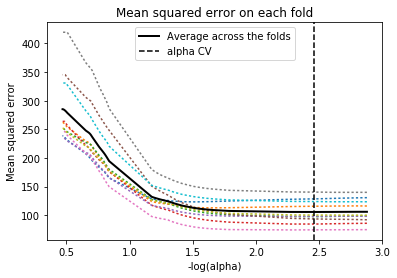

In [25]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

After performing fit of the model, I’ve analysed the alphas, that model has computed:

In [26]:
dict(zip(predictors.columns, model.coef_))

{'Age': 6.7962536978026327,
 'BlastFurnaceSlag': 7.7598599944681359,
 'Cement': 11.014345495882937,
 'CoarseAggregate': 0.0,
 'FineAggregate': 0.0,
 'FlyAsh': 4.2321735077667189,
 'Superplasticizer': 2.0108792039857328,
 'Water': -4.6169949918032973}

As seen, only two variables – CoarseAggregate and FineAggregate were removed by algorithm. 

Nevertheless, dataset is not quite appropriate to predict Concrete Compressive Strength, MSE for the model on test data was around 112 and R-square is abour 0,6. Also I’ve added a plot to show how each of variables influence the final model.

Regression Coefficients Progression for Lasso Paths:

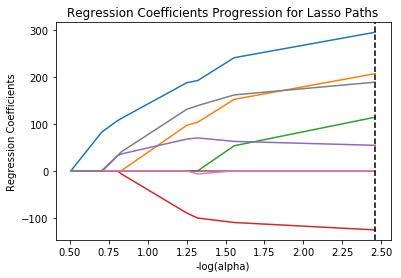

In [28]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

# Code

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None
%matplotlib inline 
rnd_state = 6789

In [5]:
df = pd.read_csv("Concrete_Data.csv", sep=";")
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,42492.0,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,42492.0,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
df.shape

(1027, 9)

In [7]:
df.dropna().shape

(1027, 9)

We see that there are no omissions in the data.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1027.0,280.950925,104.571575,102.000000,192.000000,272.800000,350.000000,540.000000
BlastFurnaceSlag,1027.0,74.060419,86.351035,0.000000,0.000000,22.000000,143.000000,359.400000
FlyAsh,1027.0,53.879017,63.834788,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1027.0,181.587488,21.375824,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1027.0,15588.141008,18042.839610,0.000000,0.000000,13.930000,33512.000000,46235.000000
CoarseAggregate,1027.0,972.907644,77.863637,801.000000,932.000000,968.000000,1029.400000,1145.000000
FineAggregate,1027.0,773.971032,79.961308,594.000000,733.500000,780.000000,824.500000,992.600000
Age,1027.0,45.713729,63.254967,1.000000,7.000000,28.000000,56.000000,365.000000
ConcreteCompressiveStrength,1027.0,35.779084,16.712643,2.331808,23.693498,34.294536,45.919102,82.599225


Select predictor variables (X) and target variable (y) as separate data sets  

In [9]:
X = df.drop('ConcreteCompressiveStrength', 1)
y = df['ConcreteCompressiveStrength']

Standardize predictors to have mean=0 and sd=1

In [12]:
predictors=X.copy()
from sklearn import preprocessing
predictors['Cement']=preprocessing.scale(predictors['Cement'].astype('float64'))
predictors['BlastFurnaceSlag']=preprocessing.scale(predictors['BlastFurnaceSlag'].astype('float64'))
predictors['FlyAsh']=preprocessing.scale(predictors['FlyAsh'].astype('float64'))
predictors['Water']=preprocessing.scale(predictors['Water'].astype('float64'))
predictors['Superplasticizer']=preprocessing.scale(predictors['Superplasticizer'].astype('float64'))
predictors['CoarseAggregate']=preprocessing.scale(predictors['CoarseAggregate'].astype('float64'))
predictors['FineAggregate']=preprocessing.scale(predictors['FineAggregate'].astype('float64'))
predictors['Age']=preprocessing.scale(predictors['Age'].astype('float64'))

Split into train test datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=3/10, random_state=rnd_state)

print("Predict train shape: ", X_train.shape)
print("Predict test shape: ", X_test.shape)
print("Target train shape: ", y_train.shape)
print("Target test shape: ", y_test.shape)

Predict train shape:  (718, 8)
Predict test shape:  (309, 8)
Target train shape:  (718,)
Target test shape:  (309,)


Specify the lasso regression model

In [15]:
model = LassoLarsCV(cv=10, precompute=False).fit(X_train,y_train)

Selected regression coefs:

In [16]:
dict(zip(predictors.columns, model.coef_))

{'Age': 6.7962536978026327,
 'BlastFurnaceSlag': 7.7598599944681359,
 'Cement': 11.014345495882937,
 'CoarseAggregate': 0.0,
 'FineAggregate': 0.0,
 'FlyAsh': 4.2321735077667189,
 'Superplasticizer': 2.0108792039857328,
 'Water': -4.6169949918032973}

Plotting coefficient progression

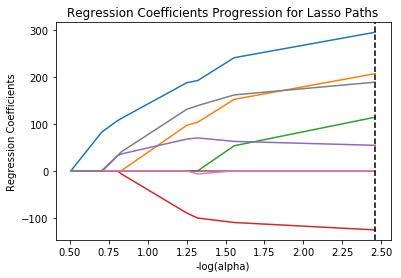

In [17]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

Plotting MSE for each fold

C:\Users\Anya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


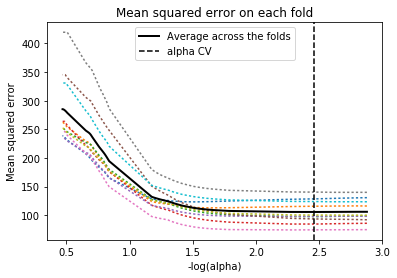

In [18]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

MSE from training and test data

In [21]:
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))
print('training data MSE', train_error)
print('test data MSE', test_error)

training data MSE 102.988621247
test data MSE 112.286864208


R-square from training and test data

In [22]:
rsquared_train=model.score(X_train,y_train)
rsquared_test=model.score(X_test,y_test)
print('training data R-square', rsquared_train)
print('test data R-square', rsquared_test)

training data R-square 0.637007493362
test data R-square 0.578532561345
